# Retrieval Practice and Learning

What is the most effective way to learn a subject? Many students focus exclusively on the _encoding_ process---that is, how to get the knowledge into memory in the first place. For example, taking notes is an activity for encoding knowledge.

_Retrieval_, on the other hand, is the process of reconstructing that knowledge from memory. [Karpicke and Blunt](http://science.sciencemag.org/content/331/6018/772) (2011) demonstrated that _retrieval_ is more effective for learning than activites designed to promote effective encoding. They conducted an experiment in which subjects had to learn about sea otters by reading a passage. Subjects were randomly assigned to one of two conditions: some were instructed to create a [concept map](https://en.wikipedia.org/wiki/Concept_map) as they read the passage, while others were instructed to practice retrieval (i.e., read the passage, recall as much as they could, read the text again, and recall again). The two main measurements they recorded were:

1. each subject's score on a follow-up learning test one week later
2. each subject's _prediction_ of how well they would do on that test

In this lab, you will analyze data from a _replication_ of Karpicke and Blunt's experiment, conducted by Buttrick _et al_.
- The data file is : data.csv.
- The codebook (explaining what the variables mean) is : codebook.csv.

In [2]:
import numpy as np
import pandas as pd

In [3]:
codebook = pd.read_csv('codebook.csv')
codebook.head()

,Name,Variable full label,Variable description,Valid range,Scoring,Value indicating missing data,Value indicating inapplicable data,Experiment file used
0,ID,Participant ID,Participant's study number/identifier,KB1 - KB52,NaN,0,NaN,NaN
1,netID,UVA netID,Student's UVA netID identifier,NaN,NaN,0,NaN,NaN
2,Date.P1,Date part 1,Date of part 1 session,00/00/00,NaN,0,NaN,NaN
3,Date.P2,Date part 2,Date of part 2 session (1 week later),00/00/00,NaN,0,NaN,NaN
4,Condition,Condition assigned,Participant's assigned study condition (block ...,Retrieval OR Concept,NaN,0,NaN,NaN


In [4]:
data = pd.read_csv('data.csv')
data.head()

,ID,Age,Gender,Date.P1,Date.P2,Condition,IC.1,IC.2,Comp.1,Comp.2,...,Scorer.2.2,R2CS.avg,TS.1,Scorer.1.3,TS.2,Scorer.2.3,TS.avg,Exc.1,Exc.2,Collection
0,KB1,18,Female,11/21/16,11/28/16,Concept,1,1,1,1,...,NaN,NaN,0.36,NK,0.42,MS,0.39,0,0,1
1,KB2,18,Male,11/21/16,11/28/16,Concept,1,1,1,1,...,NaN,NaN,0.48,MS,0.36,NK,0.42,0,0,1
2,KB3,18,Male,11/21/16,11/28/16,Concept,1,1,1,1,...,NaN,NaN,0.08,NK,0.08,MS,0.08,0,0,1
3,KB4,19,Female,11/21/16,11/28/16,Concept,1,1,1,1,...,NaN,NaN,0.44,MS,0.42,NK,0.43,0,0,1
4,KB5,19,Female,11/22/16,11/29/16,Concept,1,1,1,1,...,NaN,NaN,0.26,NK,0.28,MS,0.27,0,0,1


# Question 1

Which group felt like they learned more: the subjects who made concept maps or the ones who practiced retrieval? (Or are they about the same?) Make an appropriate visualization and explain what you see.

_Hint:_ Use the variable `PR.2`, which contains the participants' predictions of how well they would do on a test one week later. 

<AxesSubplot:xlabel='Condition'>

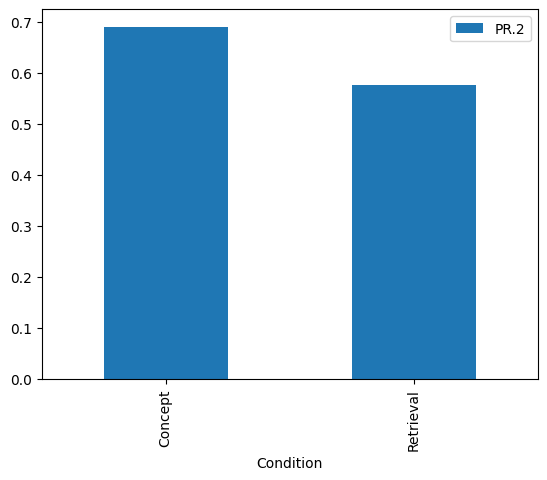

In [5]:
# YOUR CODE HERE
pd.pivot_table(data=data, values='PR.2', index='Condition', aggfunc=np.mean).plot.bar()

<AxesSubplot:xlabel='Condition'>

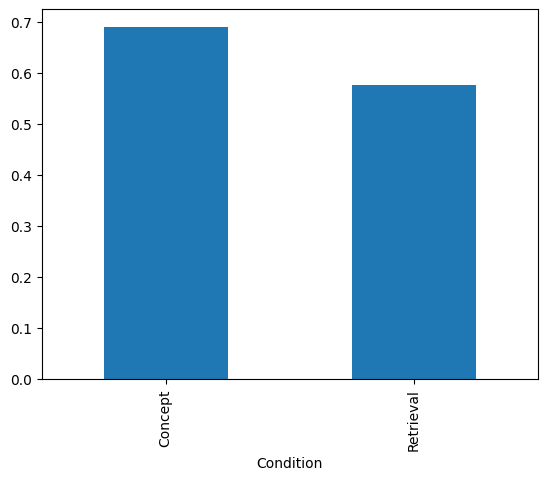

In [6]:
data.groupby('Condition')['PR.2'].mean().plot.bar()

The concept map group felt as if they learned more as their average prediciton for their test grades are higher than the retrieval group.

# Question 2

Which group actually did better on the follow-up learning test one week later? Make an appropriate visualization and explain what you see.

_Hint:_ Don't ask which variable you should use. That is for you to figure out. Read the codebook carefully (consulting the [original paper](http://science.sciencemag.org/content/331/6018/772), if necessary), make an informed decision, and explain your choice.

<AxesSubplot:xlabel='Condition'>

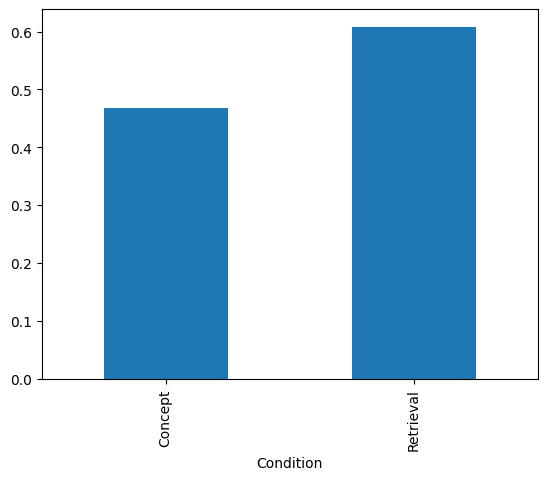

In [7]:
# YOUR CODE HERE
data.groupby('Condition')['TS.2'].mean().plot.bar()

**YOUR EXPLANATION HERE**
The mean for the test scores are visualized above and as you can tell the retrieval group scored higher overall than the concept group. 

# Question 3

How good were subjects at predicting how well they would do on the follow-up learning test? Calculate a measure of how well subjects predicted their performance and interpret the value in context. (Optionally, you may want to include a visualization as well.)

<AxesSubplot:xlabel='Condition'>

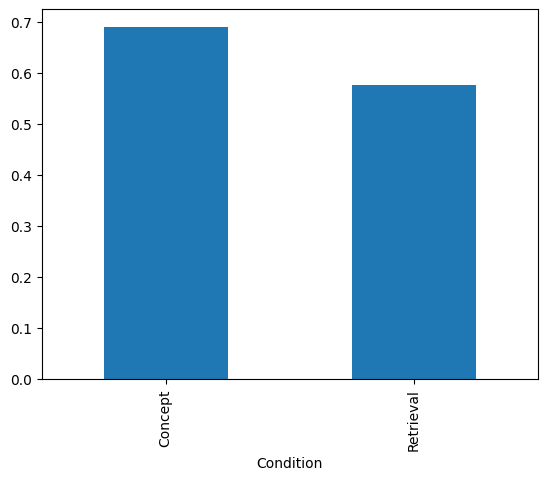

In [8]:
# YOUR CODE HERE
data.groupby('Condition')['PR.2'].mean().plot.bar()

<AxesSubplot:xlabel='Condition'>

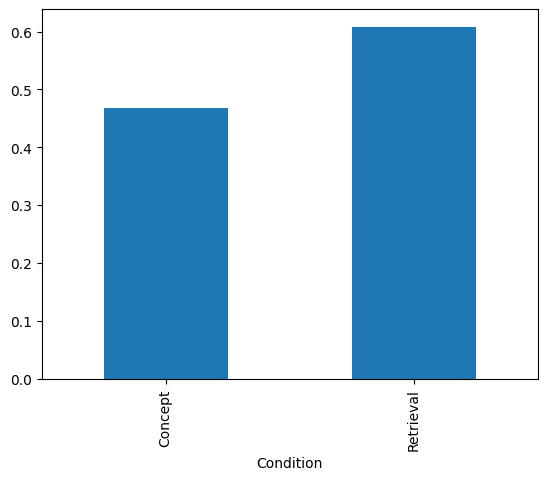

In [9]:
data.groupby('Condition')['TS.2'].mean().plot.bar()

<AxesSubplot:xlabel='Condition'>

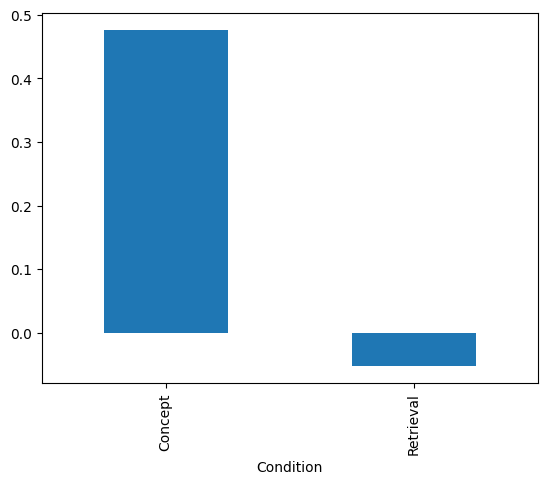

In [10]:
CTS2 = data.groupby('Condition')['TS.2'].mean()
CPR2 = data.groupby('Condition')['PR.2'].mean()
ERRORPERCENTAGE = (CPR2 - CTS2) / CTS2
ERRORPERCENTAGE.plot.bar()

**YOUR EXPLANATION HERE**
THe data visualized above is the error percentage of the groups predicted score to their actual score. As you can tell, the concept group had a higher error percentage in predicting their scores as their predicted values mean were higher than their real values mean. On the other hand, the retrieval group underestimated how well they would do and this causes a negative error percentage as their real value was higher than their predicted value.

# Question 4

This was a completely randomized experiment. This means that the condition that each subject was assigned to should be independent of their gender, age, and any other subject characteristics. Does that seem to be true in this case? Calculate a summary measure and/or make a visualization, and explain what you see.

<AxesSubplot:xlabel='Condition'>

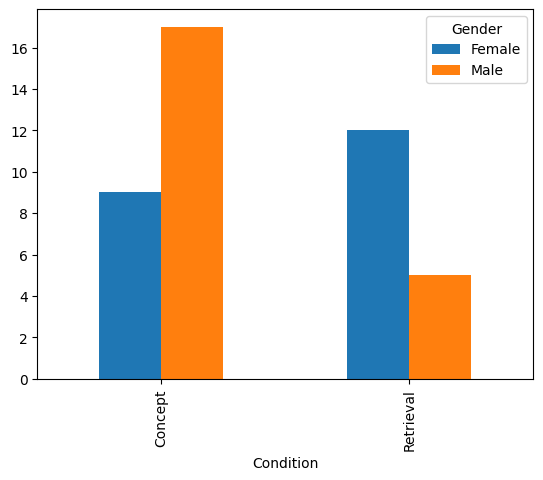

In [11]:
# YOUR CODE HERE
pd.pivot_table(data=data, values='ID', index='Condition', columns='Gender', aggfunc='count').plot.bar()

<AxesSubplot:xlabel='Condition'>

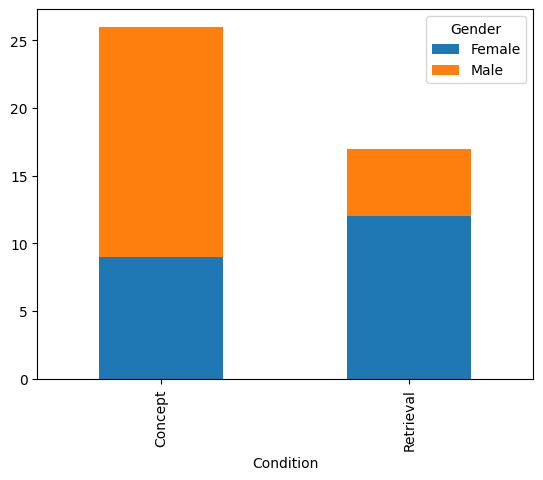

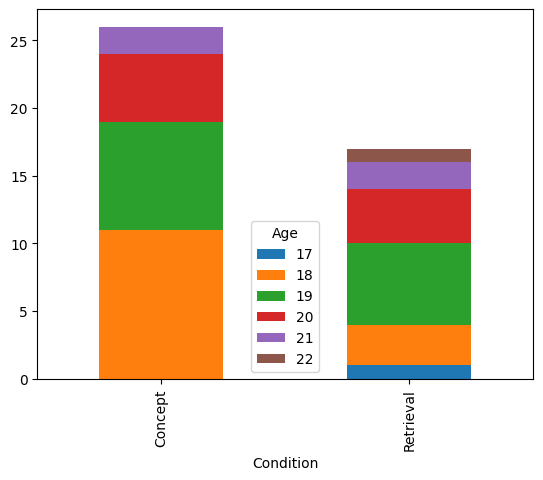

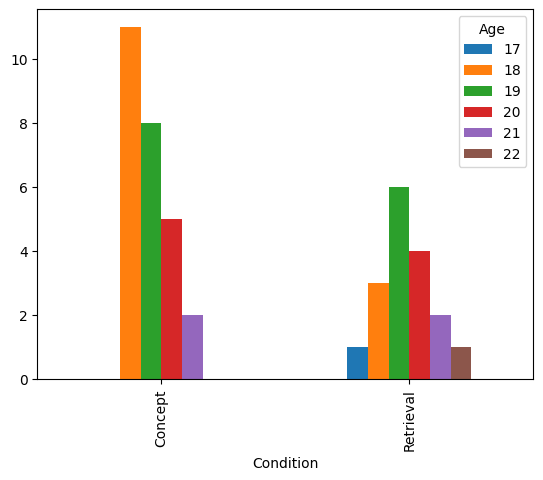

In [12]:
pd.crosstab(data['Condition'], data['Gender']).plot.bar(stacked=True)
pd.crosstab(data['Condition'], data['Age']).plot.bar(stacked=True)
pd.crosstab(data['Condition'], data['Age']).plot.bar()

**YOUR EXPLANATION HERE**

Even though the study says the particpants are randomized, in a randomized enviroment you would still see a bell curve that depicts a normal distribution or some variation that is close. The first graph depicts the differences in gender propotions within the condition groups. In the concept group, male's overpower the ratio whereas in the retrieval group it is vice versa. When you dig deeper and look at the age distributions per condition groups, you notice the concept group does not include a single 17 and 22 year old particpant. However, when you look at the retrieval group, the distribution seems more normal as it includes both ends of the age range. 

We still believe it was randomized; however we think the sampling method used did not accurately randomized the particpants.

# Submission Instructions

Once you are finished, follow these steps:

1. Restart the kernel and re-run this notebook from beginning to end by going to `Kernel > Restart Kernel and Run All Cells`.
2. If this process stops halfway through, that means there was an error. Correct the error and repeat Step 1 until the notebook runs from beginning to end.
3. Double check that there is a number next to each code cell and that these numbers are in order.

4. Upload the Notebook (ipynb) to canvas.